<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [ ]:
# 1°) Importamos Pandas --->

import pandas as pd


## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>



<font color='orange'>Objetivo: Estimar un MODELO de REGRESION LINEAL para PREDECIR el valor del inmueble, para poder lograr un sistema de valuacion Inmobilaria, en este curso haremos analisis msa Formales como TEST DE HIPOTESIS.

## Lectura de los datos

In [ ]:
# 2°) Lectura de los datos, archivo dataset.csv --->

datos = pd.read_csv("dataset.csv", sep = ";")

## Ver los datos

In [ ]:
datos


,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374
...,...,...,...,...
4995,135860,70,0.479357,0.752891
4996,166359,128,8.594487,0.370170
4997,147874,70,0.253138,0.421407
4998,35120,55,8.945226,0.680963


## Verificando el tamaño del dataset

In [ ]:
# 3°) Nos devuelve un tabla con 5000 registros(inmuebles), y 3 columnas(variables Explicativas) --->

datos.shape # tambien podemos usar: len(DataFrame)

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [ ]:
# 1°) Datos estadisticos Descriptivos --->

datos.describe().round(2)

# Podemos ver que el valor MAX de el inmueble es demasiado alto 4M, lo que sugiere que puede ser OUTLIERS.
# Los valores 0.00 del MIN con respecto a DIST_PLATA y DIST_FARMACIA, significan que el inmueble esta al lado de la
# Farmacia o Playa.

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta. Relacion directa si una variable sube la otra sube y si baja la otra baja(POSITIVA), relacion indirecta cada una de las variables van en direccion opuesta(NEGATIVA)</p>

In [ ]:
# 2°) Correlacion --->

datos.corr().round(2)

# Tenemos una CORRELACION FUERTE entre el VALOR y AREA(0.7110) y MODERADA entre VALOR y DIST_PLAYA y mas baja con DIST_FARMACIA, la
# señal negativa tiene sentido, cuanto mas distancia menos valor el Inmueble.
# Luego necesitamos que las 3 Variables Explicativas NO tengan relacion FUERTE entre si, ya que esto es malo al momento de Estimar el Modelo:
# AREA, relacion Moderada con DIST_PLAYA y con DIST_FARMACIA mas baja.
# DIST_PLAYA, relacion Baja con DIST_FARMACIA
# PODEMOS CONCLUIR QUE LAS 3 CANDIDATAS A VARIABLES EXPLICATIVAS NO TIENEN CORRELACION FUERTE ENTRE SI!


,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.00,0.71,-0.37,-0.02
Area,0.71,1.00,-0.28,-0.03
Dist_Playa,-0.37,-0.28,1.00,0.03
Dist_Farmacia,-0.02,-0.03,0.03,1.00


Definicion:

Puede sospechar la presencia de outliers con solo mirar los estadísticos descriptivos reportados por el método describe() de pandas. Valores mínimos y máximos muy diferentes de los otros estadísticos pueden hacernos sospechar de la presencia de outliers.


# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [ ]:
# 1°)
import seaborn as sns

## Configuración del formato de los gráficos

In [ ]:
# 2°) Configuramos primero la paleta y luego el estilo en el formato del grafico --->

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

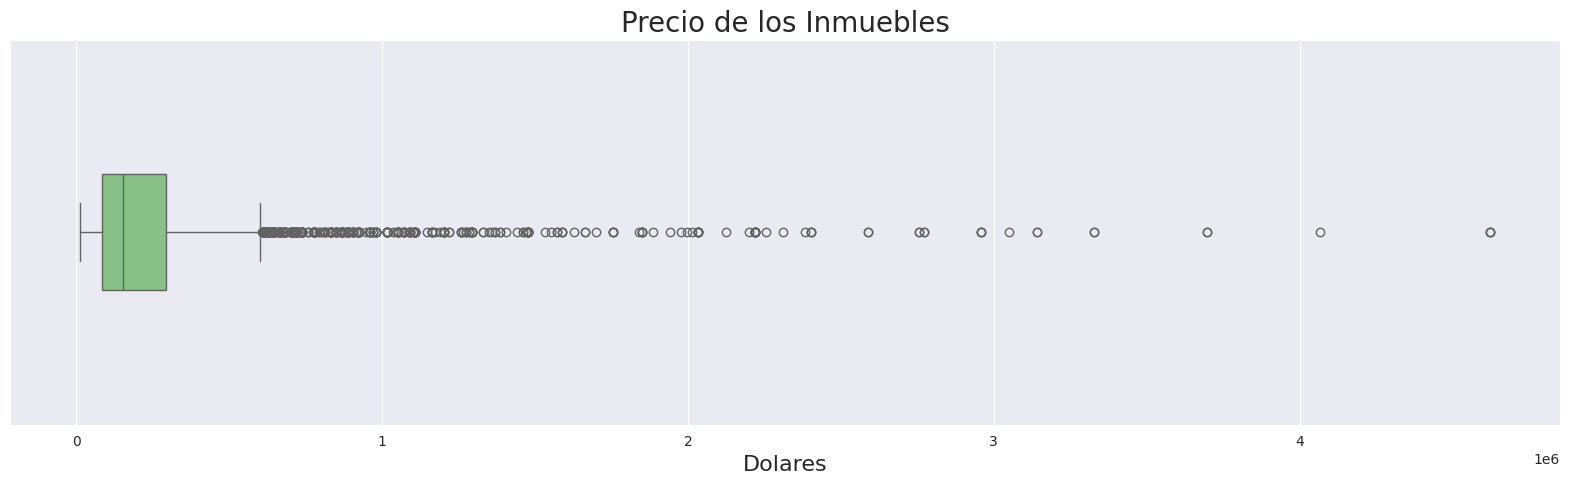

In [ ]:
# 3°) Creamos BOXPLOT con el tamaño, titulo y etiqueta x --->

ax = sns.boxplot(data = datos["Valor"], orient = "h", width = 0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax

# Este tipo de Variable tiene estipo de comportamiento, con muchos PUNTOS por encima del LIMITE SUPERIOR, debemos tener cuidado al clasificar
# todos esos PUNTOS como OUTLIERS, quizas los ultimos puntos son realmente OUTLIERS. Puede significar que estos puntos son una ASIMETRIA a la
# derecha en esta variabla de los PRECIOS DE LOS INMUEBLES, para entender mejor esto vamos a ver el HISTOGRAMA de esta Varible.

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>

Para entender mejor lo que esta sucediendo con el BOXPLOT, haremos un HISTOGRAMA de la Variable Dependiente (y).

<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<ipython-input-11-cdf319ebc2c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos["Valor"])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='Precio de los Inmuebles (US$)', ylabel='Density'>

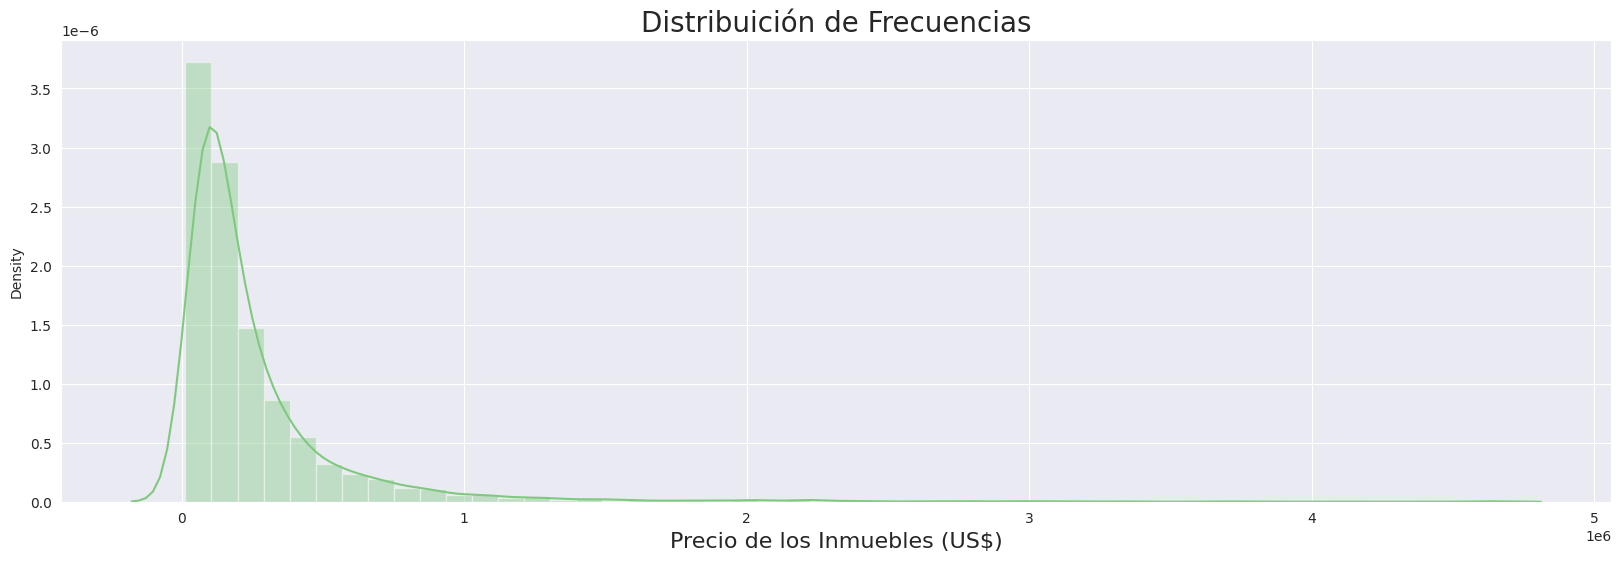

In [ ]:
# 1°) Distribucion de Frecuencia de la Variable Dependiente (Y) --->

ax = sns.distplot(datos["Valor"])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
ax

# Podemos ver una concentracion para valores mas bajos, es decir una ASIMETRIA a la derecha del grafico, esto sucede cuando en este tipo
# Variables hay precios de Inmuebles Bajos y NO carace de precios altos(lujo).
# Este tipo de grafico sucede en datos reales, pero esto puede generar problemas a la hora de ESTIMAR EL MODELO DE REGRESION, dado que los teoricos
# del modelo de regresion es que la Variable Dependiente tiene que tener una DISTRIBUCION NORMAL.

In [ ]:
# La SIMETRIA perfecta del grafico 2, dificilmente sucedera con datos reales, siempre habra una ASIMETRIA aunque sea leve.

# Nuestro formato tanto el HISTOGRAMA como el BOXPLOT se asemeja a la ASIMETRIA del grafico 1. Sin embargo podemos hacer
# TRANSFORMACIONES de los datos para que nuestra DISTRIBUCION sea menos ASIMETRICA y se acerque al grafico de SIMETRIA( Distribucion
# Normal).

# ---->>>

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

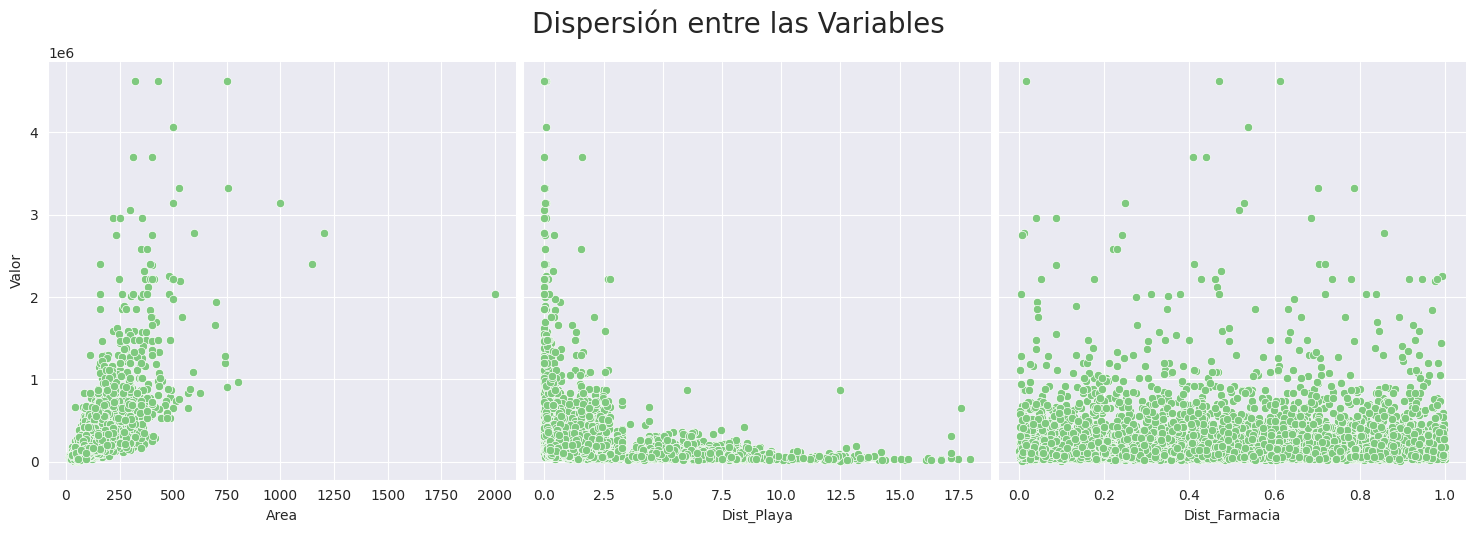

In [ ]:
# 1°) Grafico de DISPERSION entre las variables del DataSet con PARIPLOT, mas arriba vimos una ASIMETRIA a la derecha, ahora vamos
# a ver con PAIRPLOT, si existe una relacion LINEAL entre la variable DEPENDIENTE y la variable EXPLICATIVA --->

ax = sns.pairplot(datos, y_vars="Valor", x_vars=["Area", "Dist_Playa","Dist_Farmacia"], height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

# Podemos ver entre VALOR y AREA, una cierta tendencia NO LINEAL, osea una curva, lo mismo pasa entre VALOR y DIST_PLAYA que podemos
# ver una cierta curva y entre VALOR y DIST_FARMACIA, NO podemos identificar ninguna tendencia, es decir los PUNTOS NO muestran ninguna
# direccion, para ver mejor lo que suscede podemos incluir la RECTA DE REGRESION LINEAL.

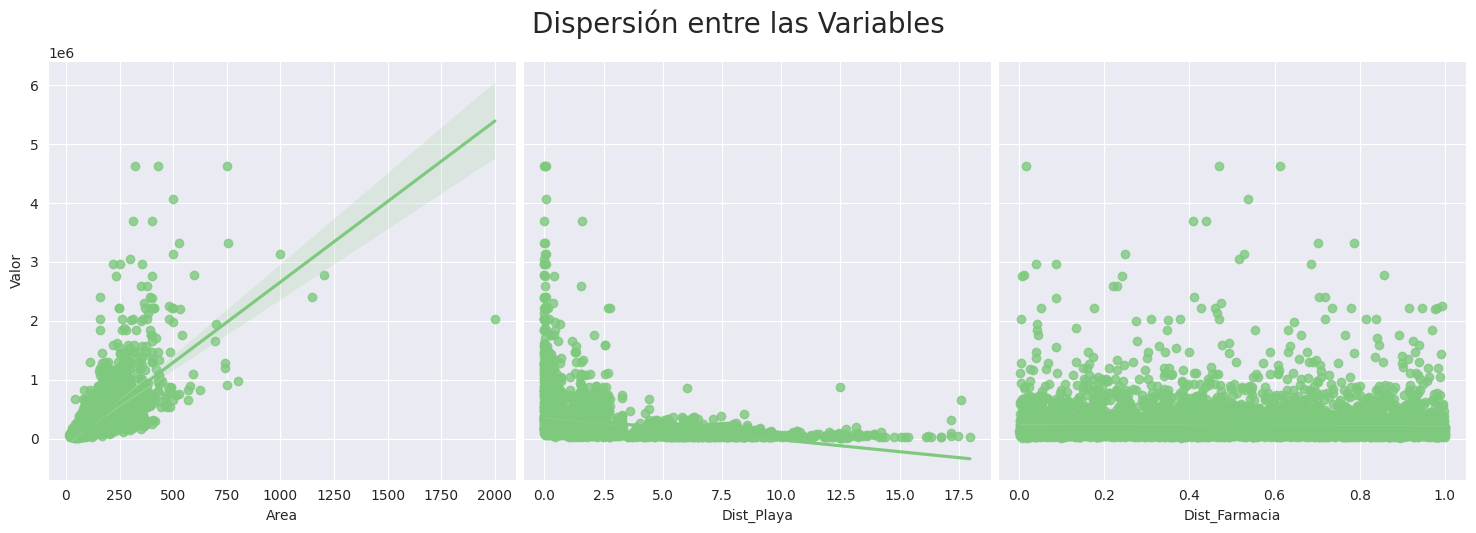

In [ ]:
# 2°) Incluimos en el grafico la RECTA DE REGRESION LINEAL, para ver mejor que suscede con los PUNTOS de DISPERSION --->


ax = sns.pairplot(datos, y_vars="Valor", x_vars=["Area", "Dist_Playa","Dist_Farmacia"], height=5, kind = "reg")
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

# Podemos ver que entre VALOR y AREA, los PUNTOS NO siguen la LINEA DE REGERSION, los puntos estan DISPERSOS en los 3 graficos y sobre todo en el grafico
# de VALOR y DIST_FARMACIA que NO la podemos ver. Por lo tanto CONCLUIMOS que, la VARIABLE VALOR NO esta realcionada de forma LINEAL con las variables EXPLICATIVAS
# por lo tanto NO podemos ESTIMAR EL MODELO DE REGRESION LINEAL, ya que no sucede uns distribucion normal.Lo que si podemos es aplicar tecnicas de
# TRANFORMACION DE LOS DATOS, en una TRANFORMACION LOGARITMO(LOG) en todas la Variables, tanto DEPENDIENTE como las EXPLICATIVAS.

Definicion:

Los diagramas de dispersión permiten identificar la relación entre dos variables.
Es posible trazar una recta de regresión entre dos variables usando la función pairplot() de seaborn.

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>

Vemos que la Variable Dependiente VALOR, nos muestra una DISTRIBUCION muy ASIMETRICA, vimos que su HISTOGRAMA mostro una gran cola a la derecha, estamos muy lejos de una DISTRIBUCION NORMAL que es la que queremos y tambien la Variable Dependiente (VALOR) nos mostro NINGUNA relacion LINEAL con las variables Explicativas. Para transformar esos datos vamos a utilizar una TRANSFORMACION LOGARITMICA.

<hr style='border: 2px solid red;'>


## <font color='orange'>Distribuición Normal
<hr>

###<font color='orange'> ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Los TEST ESTADISTICOS que vamos a ver en este curso necesitamos qye la Variable Dependiente siga una Distribucion Normal, esos test son muy importantes ya que que nos dicen si el Modelo Existe o No.
Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [ ]:
# 1°) Para utilizar la FUNCION LOGARITMICA necesitamos importar NUMPY --->

import numpy as np


## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [ ]:
# 2°) Antes de pasar los datos a Funcion Logaritmica debemos saber que --->

np.log(1)
# LOGARITMO DE 1 ES O, NO HAY NINGUN PROBLEMA CON ESTO YA QUE MODELO DE RELACION ADMITE VALORES IGUALES A 0.

0.0

In [ ]:
np.log(0)
# LOGARITMO DE 0 ES INDEFINIDO, TAMBIEN DEBEMOS SABER QUE EL LOGARITMO DE 0 ES INDEFINIDO. SI VEMOS LOS VALORES ESTADISTICOS(TABLA DESCRIBE)
# DEL DATASET VEMOS QUE LOS VALORES MINIMOS DE LAS VARIABLES ESTADISTICAS DIST_PLATA Y DIST_FARMACIA SON 0.00, COMO CONSECUENCIA NO POEMOS APLICAR
# LOG DIRECTAMENTE A ESTAS VARIABLES YA QUE VAMOS A TENER VALORES INDEFINIDOS Y EL MODELO DE REGRESION NO ADMITE VALORES INDEFINIDOS.
# ENTONCES ANTES DE APLICAR LOG A ESTAS VARIABLES TENEMOS QUE CAMBIAR SUS ESCALAS.

<ipython-input-17-bd49e852685c>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [ ]:
# 3°) Empezamos a crear el LOGARITMO  de la variable VALOR y luego AREA, DIST_PLAYA Y DIST_FARMACIA --->

datos["log_Valor"] = np.log(datos["Valor"]) # Creamos la Variables LOG_VALOR y le aplicamos LOG a la variable VALOR que NO tiene valores 0(tabla describe)
datos["log_Area"] = np.log(datos["Area"]) # Hacemos lo mismo con la Variable Explicativa Area que tampoco tiene valores iguales a 0.
datos["log_Dist_Playa"] = np.log(datos["Dist_Playa"] + 1) # Como NO podemos aplicar la FUNCION LOGARITMO directamente ya que como nos muestra la tabla
# de Desvribe de los valores estadisticos, hay valor MIN igual a 0, PARA SOLUCIONAR ESTO AGREGAMOS + 1, los valores 0 se le agregara 1 y NO seran Indefinidas
datos["log_Dist_Farmacia"] = np.log(datos["Dist_Farmacia"] + 1) # Hacemos lo mismo con la variable DIST_FARMACIA

In [ ]:
# 4°) Vemos si las variables LOG fueron creadas --->

datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,0.240925,0.793637,13.653317,5.634790,0.215857,0.584245
1,166359,208,0.904136,0.134494,12.021903,5.337538,0.644028,0.126187
2,471349,170,0.059525,0.423318,13.063354,5.135798,0.057821,0.352991
3,101664,100,2.883181,0.525064,11.529429,4.605170,1.356655,0.422036
4,406654,164,0.239758,0.192374,12.915718,5.099866,0.214916,0.175946


## Distribuición de frecuencias de la variable *dependiente transformada* (y)

<ipython-input-20-2212a33480cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos["log_Valor"])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='log del Precio de los Inmuebles', ylabel='Density'>

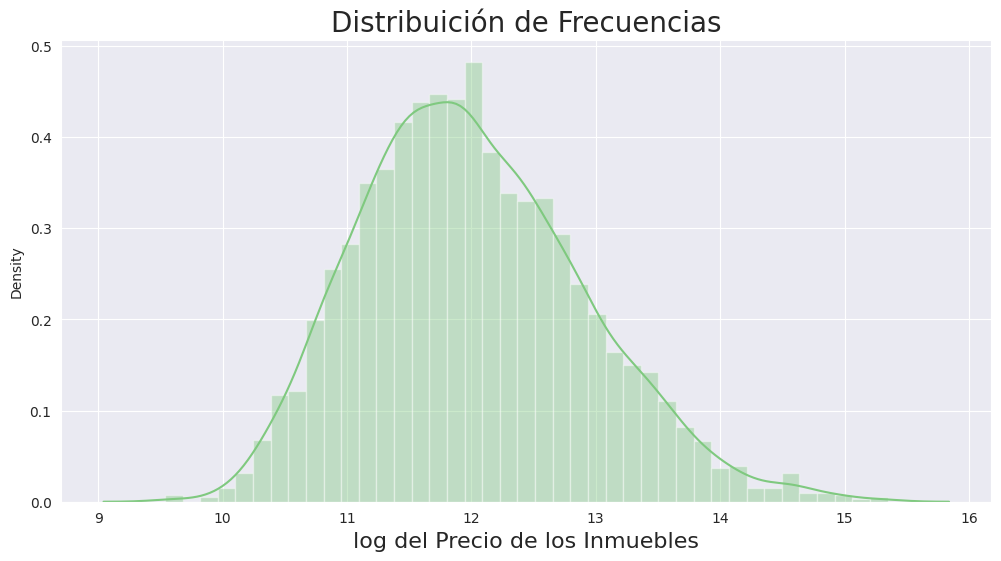

In [ ]:
# 5°) Ahora vemos si la TRNSFORMACION LOGARITMICA logro reducir la ASIMETRIA en la variable VALOR, construimos HISTOGRAMA --->

ax = sns.distplot(datos["log_Valor"])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

# Podemos ver que la TRANSFORMACION LOGARITMICA pudo reducir la ASIMETRIA, que habia en el HISTOGRAMA de la variable VALOR
# NO vemos cola hacia la derecha y podemos ver una Distribucion Normal.

Definicion:

**¿Por qué transformar los datos?** ---> Una de las principales razones para transformar algunos tipos de datos es intentar corregir la asimetría que la distribución de los datos pueda presentar. Este fue el principal objetivo de la transformación que llevamos a cabo en nuestro curso.

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>

Vimos que la TRANSFORMACION LOGARITMICA, logra reducir la ASIMETRIA en la Variable Dependiente.

<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

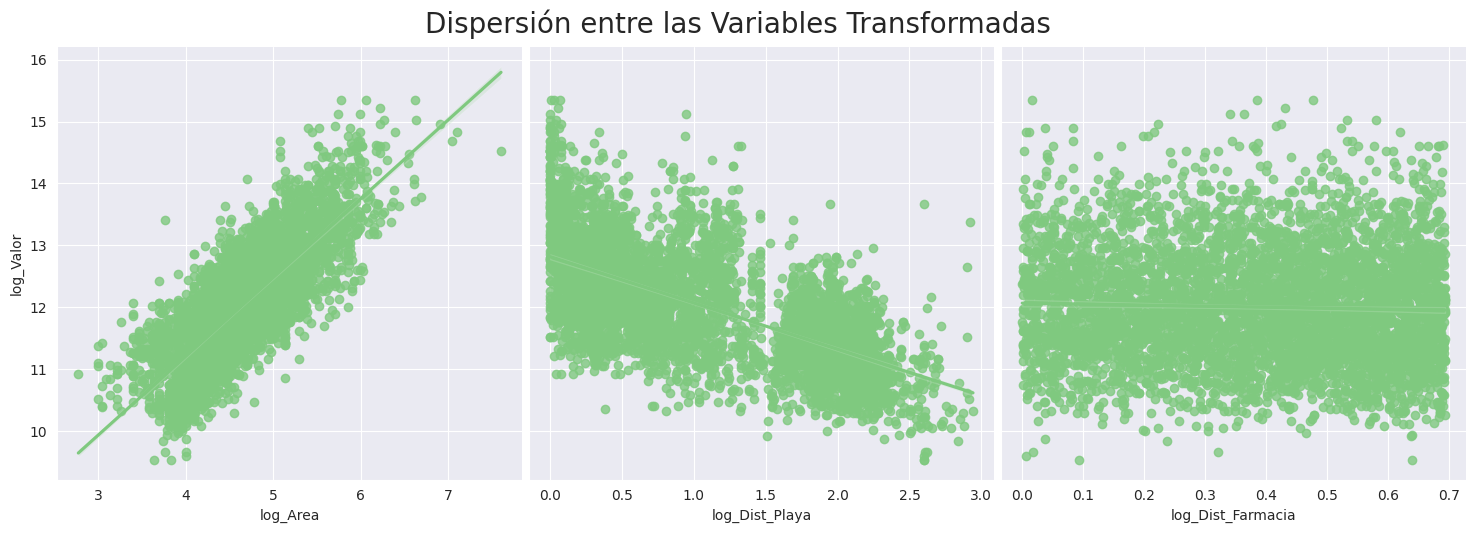

In [ ]:
# 1°) Ahora vamos a ver si la TRANSFORMACION LOGARITMICA podemos tener una Relacion LINEAL entre la Variable DEPENDIENTE y las
# Variables EXPLICATIVAS, para esto hacemos de nuevo el grafico de DISPERSION --->

ax = sns.pairplot(datos, y_vars="log_Valor", x_vars = ["log_Area", "log_Dist_Playa", "log_Dist_Farmacia"], height=5, kind="reg")
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

# Podemos ver que tenemos relaciones mas LINEALES, principalmente en el LOG_AREA y LOG_VALOR, donde hay una relacion LINEAL POSITIVA, entre
# LOG_VALOR y LOG_DIST_PLAYA vemos una relacion LINEAL menos fuerte y NEGATIVA, esto ya nos lo habia indicado el COEFICIENTE de CORRELACION(-0.3665)
# NEGATIVA, sin embargo NO tenemos una entre las variables LOG_VALOR y LOG_DIST_FARMACIA ya que la variacion es CONSTANTE, esto tambien nos habia
# indicado el COEFICIENTE de CORRELACION(-0.0244) cercano a 0. Probablemente LOG_DIST_FARMACIA sea ELIMINADA del Modelo al hacer los Test Estadisticos
# que aprenderemos mas adelante. Ahora que tenemos mas relaciones LINEALES podemos realizar el Modelo de Regresion(Entrenamiento-Prueba).

Definicion:

Usamos la biblioteca numpy para realizar la transformación de datos. numpy es un paquete fundamental para la computación científica en Python, que proporciona un conjunto muy amplio de operaciones matriciales y matemáticas,import numpy as np, np.log(datos['Valor'] + 1).

Como la variable tiene valores cero en algunos registros, la forma más correcta de transformación es agregar una constante, diferente de cero, a los datos, para evitar la pérdida de información, ya que log(0) no existe.

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>

En lo anterior vimos y verificamos una RELACION LINEAL entre las Variable TRANSFORMADAS. Antes de implementar el Modelo de Regresion debemos usar un procedimiento utilizado, QUE CONSISTE EN DIVIDIR AL AZAR LOS DATOS EN 2 PARTES, una para ENTRENAR el modelo y la otra parte EVALUAR el Modelo, Procedimiento, este procedimiento lo vamos a utilizar a traves de la FUNCION TRAIN_TEST_SPLIT de la biblioteca SCIKIT-LEARN.

<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# 1°) Importamos la biblioteca --->

from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [ ]:
# 2°) Para usar la Funcion TRAIN_TEST_SPLIT, debemos crear algunos PARAMETROS DE ENTREDA, los 2 primeros son,
# un DATAFRAME par almacenar la Variable DEPENDIENTE (Y), el segundo parametro de entrada sera un DATAFRAME que
# almacenara las Variables EXPLICATIVAS (X) --->

y = datos["log_Valor"] # PRIMER parametro, V. Dependiente alamacenada en DataFrame
y

0       13.653317
1       12.021903
2       13.063354
3       11.529429
4       12.915718
          ...    
4995    11.819380
4996    12.021903
4997    11.904116
4998    10.466526
4999    11.529429
Name: log_Valor, Length: 5000, dtype: float64

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [ ]:
# 3°) SEGUNDO parametro V. Explicativas alamacendas en DataFrame --->

X = datos[["log_Area", "log_Dist_Playa", "log_Dist_Farmacia"]]
X

,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,5.634790,0.215857,0.584245
1,5.337538,0.644028,0.126187
2,5.135798,0.057821,0.352991
3,4.605170,1.356655,0.422036
4,5.099866,0.214916,0.175946
...,...,...,...
4995,4.248495,0.391608,0.561266
4996,4.852030,2.261189,0.314935
4997,4.248495,0.225651,0.351647
4998,4.007333,2.297093,0.519367


## Creando los datasets de entrenamiento y de prueba

In [ ]:
# 4°) Creamos los datasets de ENTRENAMINETO Y PRUEBA con la Funcion TRIAN_TEST_SPLIT(), mirando la info que nos brinda colab
# vemos que la Funcion nos devuelve 4 elementos, los copiamos y agregamos --->

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2811)

# X_train = X del conjunto de Entrenamiento que almacenara los valores de las Variables Explicativas del conj. de Entrenamiento.*
# X_test = X del conjunto de Prueba que almacenara los valores de las Variables Explicativas del conj. de Prueba. ""
# y_train = Variable Dependiente que sera alamacenada con el conj. de Entrenamiento. *
# y_test = Variable Dependiente que sera alamacenada con el conj. de Prueba.""
# *= Relacionadas mismo registros. ""= Relacionadas mismo registros.
# y, X = Los DataFrame creados para las Variable Dependiente y las Variables Explicativas.
# test_size=0.2 = Cantidad en % que vamos a separar para el conjunto de Prueba, 0.2 utilizaremos en este caso ya que tenemos muchos
# registros(5000), 20% para PRUEBA, 80% para ENTRENAMIENTO.



# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

<font color='orange'>Trabajaremos con STATSMODELS ya que transformamos las variables para ajustarlas a la Regresion Lineal con LOG.

https://www.statsmodels.org/stable/index.html

In [ ]:
# 1°) Importamos la biblioteca STATSMODELS, la funcion statsmodels a diferencia de SCIKIT-LEARN, le debemos indicar explicimante
# que queremos la CONSTANTE del Modelo, el B1, caso contrario la Funcion STATSMODELS NO incluira la CONSTANTE, para incluirla al
# modelo debemos incluir un DATAFRAME del conjunto de ENTRENAMIENTO formado por las VARIABLES EXPLICATIVAS, X_TRAIN. Entonces
# tenemos que crear un nuevo DATAFRAME donde vamos a incluir la CONSTANTE --->

import statsmodels.api as sm

## Estimando el modelo con statsmodels

In [ ]:
# 2°) Creamos el nuevo Modelo DataFrame de las VARIABLES EXPLICATIVAS --->

X_train_con_constante = sm.add_constant(X_train)
# X_train= constante que es el conjunto formado por las Variable Explicativas (entrenamiento)
X_train_con_constante

# SI CONSIDERAMOS LA CONSTANTE, LA PRIMER COLUMNA SERA FORMADA POR 1, CON ESTE DATAFRAME CREADO PODEMOS UTILIZAR STATSMODELS.
# PODEMOS NO INCLUIR LA CONSTANTE, PERO SI LA INCLUIMOS TENDREMOS UN PROMEDIO DE RESIDUOS(Ui) = 0.

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [ ]:
# 3°) Para ESTIMAR el modelo de STATSMODELS --->

modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hascont=True).fit()

# modelo_statsmodels = nombre del modelo Estimado
# sm.OLS = sm, statsmodels, OLS, metodo que estima el Modelo de Regresion Lineal
# y_train = Datos de entrenamineto de la V. DEPENDIENTE.
# X_train_con_constante = Entrenamiento de las V. EXPLICATIVAS con CONSTANTE.
# hascont=True = Funcion para decirle a StatsModels que la CONSTANTE fue añadida al DataFrame de las V. Explicativas.
# fit() = Para Estimar COEFICIENTES.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


Definicion:

STATSMODELS es un módulo de Python que proporciona clases y funciones para estimar muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y minería de datos.

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
print(modelo_statsmodels.summary())

# Nos devuelve resultado de la TABLA de REGERSION OLS.

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:17:19   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

###<font color='orange'> EXPLICACION DE LA TABLA OLS CON STATSMODELS DE LA REGRESION LINEAL DEL MODELO :

- **NO-OBSERVATIONS** = 4000, son 4000 observaciones porque separamos 80% los datos para Entrenamiento.

- **R-SQUARED(r-cuadrado)** = 0.805, mide el grado del modelo de los datos, nos da un valor alto, independiente si se agregan mas variables utiles o inutiles siempre dara valor mas alto.

- **ADJ. R-SQUARED(r-cuadrado ajustado)** = 0.805, ajustado en base a los grados de Libertad, a medida que agregamos una Variable al Modelo perdemos un grado de Libertad, adj. r-squared penaliza Modelos con muchas Variables que NO ayudan en absoluto en la calidad de las Predicciones del modelo, si agregamos variables inutiles disminuye ya que perdemos muchos grados de Libertad.

- **COEF** = Estimaciones de cada Coeficiente de cada modelo(const,log_Area,log_Dist_Playa,log_Dist_Farmacia).

- **STD ERR** = Desviacion de cada Coeficiente estimado.

- **F-STATISTIC** = 5495, prueba la Significancia conjunta de los Coeficientes del modelo, nos dice si el Modelo tiene sentido o NO, la HIPOTESIS NULA: nos dice que todos los Coeficientes son iguales a 0 y la HIPOTESIS ALTERNA : nos dice que al menos unos de esos Coeficientes es diferente de 0, al menos 1 de las Variables Explicativas influye en la Variable Dependiente. Es decir, que en log_Area, los_Dist_Playa y log_Dist_Farmacia la HIPOTESIS NULA nos dice que sus coeficientes son iguales a 0, y en la HIPOTESIS ALTERNA al menos 1 de las 3 influye en la variables Dependiente.

###<font color='orange'> *Como pruebo esto???* *De Hipotesis Nula y Hipotesis Altera :*

- **PROB F-STATISTIC** = 0.00, - Si es MAYOR aceptamos la Hipotesis Nula de que los coeficientes son iguales a 0. - Si es MENOR rechazamos la Hipotesis Nula, nuestro Modelo paso la PRUEBA F-STATISTIC, es significante.

Prob (F-statistic) <= 0.05 ---> 0.00 <= 0.05, Nuestro modelo es 0.00 MENOR a 0.05, nuestro modelo paso el TEST F.

- **T** = Verificamos el Test T, que prueba la importancia INDIVIDUAL de cada coeficiente (log_Area, los_Dist_Playa y log_Dist_Farmacia) miramos en la tabla P > |t|. -Si el P-VALOR es MAYOR a 0.05 aceptamos la HIPOTESIS NULA.-Si EL P-VALOR, es MENOR que 0.05, rechazamos la Hipotesis nula y podemos decir que el Coeficiente estadisticamente Significativo de 0.05 de Significancia.


P > |t| --->

-0.00 <= 0.05 = LOG_AREA (B2) y LOS_DIST_PLAYA (B3), estadisticamente
significativo, menor a 0.05, influyen en la Variable Dependiente.

-0.603 <= 0.05 = LOG_DIST_FARMACIA (B4), el P-VALOR es mayor a 0.05, el coeficiente de esta Variable NO es estadisticamente Significativo, NO ayuda a explicar la Varicion Metrica de la Variable Dependiente, NO pasa la Prueba T, podemos eliminar esta Variable en el Modelo.





Definicion:  

La biblioteca statsmodels proporciona un conjunto más amplio de estadísticas de prueba sobre sus outputs. En nuestro curso, destacaremos las pruebas F y t.

- La prueba t se usa para probar la significancia de cada parámetro individualmente. Prueba la hipótesis de que el coeficiente es igual a cero.

La prueba F se utiliza para probar simultáneamente la importancia de un conjunto de parámetros.

- Prueba la hipótesis de que todos los coeficientes de regresión son iguales a cero.

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font> (sin log_dist_farmacia)

Vimos que LOG_DIST_FARMACIA NO influye en la Variable Dependiente, de acuerdo a P > |t| <= 0.05, por lo tanto tenemos que Estimar otra vez el Modelo pero sin esta Variable. Repitiendo el conjunto de Entrenamiento y Prueba.

<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

In [ ]:
# 1°) Creamos nuevo conjunto de datos de la Variables Explicativas de (X), la Variable Dependiente (Y) NO tuvo
# modificacion --->

X = datos[["log_Area", "log_Dist_Playa"]]
X

,log_Area,log_Dist_Playa
0,5.634790,0.215857
1,5.337538,0.644028
2,5.135798,0.057821
3,4.605170,1.356655
4,5.099866,0.214916
...,...,...
4995,4.248495,0.391608
4996,4.852030,2.261189
4997,4.248495,0.225651
4998,4.007333,2.297093


## Creando los datasets de entrenamiento y de prueba

In [ ]:
# 2°) Creamos los datasets de Entrenamiento y Prueba, sin la Variable LOG_DIST_FARMACIA --->

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2811)

## Estimando el modelo con el statsmodels

In [ ]:
# 3°) Entrenamos el Modelo con STATSMODELS, pero antes tenemos que incluir la CONSTANTE --->

X_train_con_constante = sm.add_constant(X_train)
X_train_con_constante

,const,log_Area,log_Dist_Playa
2661,1.0,5.945421,0.000000
912,1.0,3.135494,0.972865
3042,1.0,4.317488,1.794961
141,1.0,3.401197,0.310455
3854,1.0,5.676754,0.032193
...,...,...,...
3657,1.0,5.075174,2.023480
979,1.0,4.174387,2.296141
2389,1.0,4.394449,1.367741
447,1.0,3.951244,2.166841


In [ ]:
# Para ESTIMAR el modelo de STATSMODELS --->

modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hascont=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
# 4°)

print(modelo_statsmodels.summary())

# Nos devuelve resultado de la TABLA de REGERSION OLS.

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:17:19   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6467      0.059    129.

###<font color='orange'> EXPLICACION DE LA TABLA OLS CON STATSMODELS DE LA REGRESION LINEAL DEL MODELO SIN LA VARIABLE LOG_DIST_FARMACIA :

- **R-SQUARED(r-cuadrado)** = 0,805, **ADJ. R-SQUARED(r-cuadrado)** = 0,805, mismo valor que en la anterior tabla de OLS con la variable log_dist_farmacia, es una señal de que esta variable NO es importante para estimar el Modelo.

- **F-STATISTIC** = 8244, **PROB(F-STATISTIC)** = 0.00, podemos ver que su valor del conjunto de parametros sigue siendo MENOR a 0.05, podemos decir que nuestro Modelo paso el TEST F.

- **T(P > |t|)**, tambien son MENORES a 0.05, tenemos evidencia estadistica para creer que LOG_AREA y LOG_DIST_PLAYA influyen en el precio de los Inmuebles(valor y) alrededor del 5% de Significancia. Nuestro Modelo paso el TEST F (parametros conjuntos) y TEST T (parametros individuales), lo que es muy bueno.

La unica manera de mejorar este Modelo es buscar nuevas Variables Explicativas y verificar luego con el TEST F y T.

Logramos reducir el COSTO del MODELO, ya que NO tendremos que pagar datos sobre la distancia que hay entre los Inmuebles y la Farmacia.



# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font> scikit-learn

En lo anterior usamos TEST F y T y llegamos a un modelo especificado. Ahora lo que queda es generar las PREDICCIONES y evaluarlas usando los datos de prueba. Para esto vamos a volver a la bibiloteca SCIKIT-LEARN.

<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
# 1°) Impotamos LinearRegreion para ESTIMAR el modelo y generar PREDICCIONES --->

from sklearn.linear_model import LinearRegression
from sklearn import metrics # Importamos la Funcion METRICS para evaluar las PREDICCIONES.

## Instanciando la clase *LinearRegression()*

In [ ]:
# 2°) Instanciamos LinearRegression(), llamandola MODELO --->

modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
# 3°)  Utilizamos la Funcion FIT() para Estimar el Modelo con los datos de Entrenamiento --->

modelo.fit(X_train, y_train) # DataFrame de las Variables Explicativas y Variables Dependiente.

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
# 4°) Obteniendo el COEFICIENTE de DETERMINACION (R²) del modelo estimado con los datos de Entrenamiento --->

print("R² = {}".format(modelo.score(X_train, y_train).round(3))) # SCORE, funcion que calcula el R² del modelo.

# Nos devuelve el mismo valor que la tabla de STATSMODELS

R² = 0.805


## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
# 5°) Generamos las PREDICCIONES del modelo para los datos de PRUEBA(X_TEST) con el Metodo PREDICT(), para ver si las PREDICCIONES
# que el modelo genera estan cerca de los valores Reales o Verdaderos de los precios de los Inmuebles, antes de generar las
# PREDICCIONES tenemos que crear un DataFrame para almacenarlas --->

y_predicho = modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
# 6°) Obtenemos del COEFICIENTE de DETERMINACION (R²) para los PREDICCIONES de nuestros Modelo, volvemos a calcular el R² --->

print("R² = {}".format(metrics.r2_score(y_test, y_predicho).round(3))) # En lugar de modelo ponemos METRICS, y agregamos y_test y y_predicho

# 0.79 MUY PROXIMOS AL R² QUE MIDE EL AJUSTE DEL MODELO (R² = 0.805) , LO QUE ES UNA SEÑAL MUY BUENA DE QUE VAMOS POR BUEN CAMINO, NO HUBO
# PRACTICAMENTE DIFERENCIA ENTRE EL R² QUE MIDE EL PODER DE PRONOSTICO DEL MODELO.
# PODEMOS LLEGAR A LA CONCLUSION, DE QUE EL MODELO ES CAPAZ DE PRODUCIR PREDICCIONES CERCANOS A LOS VALORES REALES DE LOS PRECIOS DE LOS
# INMUEBLES.

R² = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>

Anteriormente Estimamos el Modelo y evaluamos sus Pronosticos usando R² para los datos de PRUEBA y obtuvimos un R² muy bueno del 79%. Como obvtuvimos un buen MODELO tanto en terminos de AJUSTE como en terminos de PRONOSTICO podemos comenzar a PREDECIR los precios de los Inmuebles de acuerdo con valores nuevos o arbitrarios de las Variables Explicativas.

<hr style='border: 2px solid red;'>

## Datos de entrada

In [ ]:
# 1°) Tomamos la primera linea de X_TEST --->

entrada = X_test[0:1] # Pasamos la primer linea del Dataframe del TEST de PRUEBA X_test(Explicativas).
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


## Generando predicción puntual

In [ ]:
# 2°) Entonces podemos computar ls PREDICCION del precio de este Inmueble usando los COEFICIENTES ESTIMADOS de nuestro
# Modelo, para esto vamos a usar la Funcion PREDICT()--->

modelo.predict(entrada)[0] # [0], para la primera linea.

# PREDICT, genera un PRONOSTICO de 12.59, RECORDANDO QUE ESTAMOS EN LA ESCALA LOGARITMICA, para tener el valor PREDICHO en DOLARES,
# tendremos que INVERTIR la Funcion LOGARITMICA aplicando la FUNCION EXPONENCIAL !!!

12.596570808197772

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [ ]:
# 3°) Aplicamos la FUNCION EXPONENCIAL, usando la biblioteca NUMPY --->

np.exp(modelo.predict(entrada)[0])

# NOS DEVUELVE LA PREDICCION EN DOLARES US$ 295543 ES EL VALOR DEL INMUEBLE CON ESAS CARACTERISTICAS DE LA PRIMERA LINEA.

295543.35077471804

## Creando un simulador simple

In [ ]:
# 4°) Por ejemplo el usuario puede pedir para que el Modelo al pasar la ESTIMATIVA DEL PRECIO del inmueble tenga las
# siguientes caracteristica: --->

Area = 150     # Estos valores estan en escala original de dataframe datos, los tenemos que pasar a LOG que es como esta el MODELO.
Dist_Playa = 1

entrada = [[np.log(Area), np.log(Dist_Playa+1)]] # Pasamos los datos de entrada a LOG, en DIST_PLAYA agregamos + 1 porque dist_playa tiene algunos
# valores en iguales a 0 y LOG NO lo permite.

print("US$ {}".format(np.exp(modelo.predict(entrada)[0]).round(2))) # Pedimos que nos imprima el resultado PREDICHO usando np con la FUNCION EXPONENCIAL
# PARA QUE NOS DEVUELVA EL VALOR EN ESCALA DE DOLAR de acuerdo a los valores de entrada.

# TENEMOS NUESTRO PRECIO PREDICHO DE UN INMUEBLE CON 150 mt2 Y DISTANCIA A LA PLAYA DE 1 km, CON ESAS CARACTERISTICAS EL PRECIO ESTIMADO
# POR NUESTRO MODELO SERA DE US$ 299013.68, CON ESTO TENEMOS UN PEQUEÑO SIMULADOR DONDE PODEMOS CAMBIAR LOS VALORES DE LAS VARIABLES
# EXPLICATIVAS PARA VER COMO CAMBIA LA ESTIMATIVA DEL VALOR DEL INMUEBLE.

US$ 299013.68


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

In [ ]:
# 1°) Para saber que Varible Impacta mas en el VALOR DEL INMUEBLE --->

modelo.intercept_

# Vemos que el VALOR ESTIMADO del COEFICIENTE es igual al valor de la tabla de STATSMODELS(COEF), en el modelo
# LOG_LINEAL, B1 esta en LOG

7.646667897902708

In [ ]:
# Aplicamos EXPONENCIAL para ver el valor en US$ --->

np.exp(modelo.intercept_)

# El valor en US$ de B1 es de 2093 en DOLARES(precio del inmueble)

2093.657672537765

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

In [ ]:
# 2°) En el MODELO DE LOG-LINEAL los COEFICIENTES de REGRESION mide cuanto porcentaje varia Y dada una Variacion Porcentual
# de cada una de las Variables Explicativas, vemos los COEFICIENTES de REGRESION B2 y B3 --->

modelo.coef_

# Mismos valores de COEFICIENTES que en STATSMODELS de B2 y B3.

array([ 1.05807806, -0.49061238])

## Confirmando el orden de las variables explicativas en el DataFrame

In [ ]:
# 3°) Hacemos un DataFrame para que tengamos un resumen de todos los datos, de todos los COEFICIENTES y todos sus valores Estimados
# Pero antes tenemos que confirmar los nombres de nuestras VARIABLES EXPLICATIVAS de X --->

X.columns

# Confirmamos los nombres.

Index(['log_Area', 'log_Dist_Playa'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [ ]:
# 4°) Creamos lista con los nombres de las Variables correspondientes a cada B2 y B3 --->

index = ["Intercept", "Log Area", "Log Distancia a la Playa"]

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
# 5°) Ahora unimos todo y creamos el DATAFRAME --->

pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ["Parametros"])

# NP.APPEND = Para unir el array de INTERCEPT y COEFICIENTES
# Nos devuelve el DATAFRAME con los resumenes de los parametros Estimados.

## <font color='orange'> Interpretación de los Coeficientes Estimados :

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>

Tenemos nuestro MODELO ESTIMADO, hicimos TEST DE HIPOTESIS con los TEST F y T, evaluamos las PREDICCIONES y aprendimos sobre la interpretacion de los Parametros Estimados del Modelo LOG-LINEAL.

<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [ ]:
# 1°) Ahora analizamos el comportamiento de los RESIDUOS los cuales muestran la salud del MODELO, los diagnosticos RESIDUOS
# son siempre realizados en los datos de ENTRENAMIENTO pues son con ellos que el MODELO fue ESTIMADO, entonces lo primero que vamos
# a hacer es ESTIMAR los precios en base a los datos de ENTRENAMIENTO a estas PREDICCIONES, usamos la Funcion PREDICT() --->

y_predicho_train = modelo.predict(X_train) # modelo, nombre del modelo ajustado.

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Predicción X Real'}, xlabel='log del Precio - Predicción', ylabel='log del Precio - Real'>

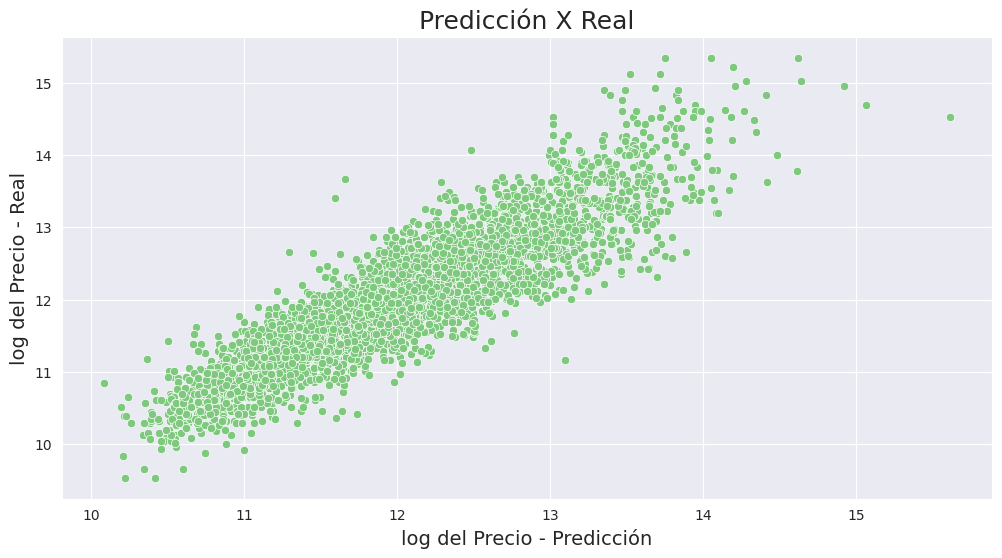

In [ ]:
# 2°) Ahora vamos a comparar el Y_PREDICHO_TRAIN con los valores REALES del conjunto ENTRENAMIENTO, para esto vamos
# a construir el grafico de DISPERSION --->

ax = sns.scatterplot(x=y_predicho_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

# La idea del grafico es que esperamos que los PUNTOS sigan patron de una RECTA, cuanto mas sigue una RECTA los puntos, menos
# DISPERSOS los puntos, menos son los ERRORES de las ESTIMACIONES, podemos ver un comportamiento razonable, sin embargo podemos ver
# que para valores mas altos de los inmuebles hay una mayor DISPERSION de los puntos y esto puede deberse a ese problema de la ASIMETRIA
# que vimos en los datos ORIGINALES, donde tenemos poca informacion en ese rango de los inmuebles que son de LUJO, ya que estos inmuebles
# tienen caracteristicas mas peculiares, ubicados en regiones muy diferentes a la de los otros inmuebles, entonces, para mejorar el AJUSTE
# del MODELO tenemos que buscar mas VARIABLES EXPLICATIVAS que sean mas relevantes para capitar mejor la diferencia entre los precios, pero
# nuestro grafico NO es tan malo, sigue mas o menos una RECTA.

## Obteniendo los residuos

In [ ]:
# 3°) Recordando que los RESIDUOS son el termino Ui que representa la parte de la Variacion en la VARIABLE DEPENDIENTE
# que NO pudo ser explicada por las VARIABLES EXPLICATIVAS de nuestro MODELO --->

residuo = y_train - y_predicho_train # Diferencia entre los valores REALES de Y - Valores Estimados de nuestro MODELO

## Graficando la distribuición de frecuencias de los residuos

<ipython-input-54-999a53cf5a44>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuición de Frecuencias de los Residuos'}, xlabel='log del Precio', ylabel='Density'>

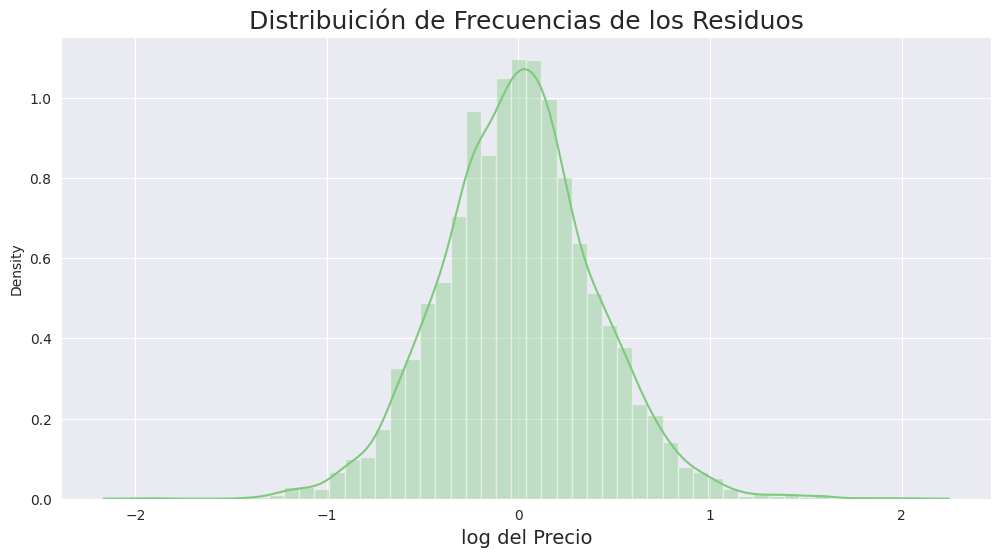

In [ ]:
# 4°) Construimos HISTOGRAMA DE LOS RESIDUOS y esperamos que este HISTOGRAMA tenga una forma parecida con la DISTRIBUCION
# NORMAL(campana)--->

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax

# PODEMOS VER QUE LA DISTRIBUCION DE LOS RESIDUOS SE COMPORTA BIEN, SE PARACE MAS A O MENIS A LA DISTRIBUCION NORMAL.
# PODEMOS VERIFICAR SI LOS RESIDUOS TIENEN UNA VARIANZA CONSTANTE, HOMOCEDASTICIDAD DE LOS RESIDUOS, PODEMOS CHEQUEAR
# CON ESO PARA VER SI CUMPLE CON LA HIPOTESIS DE HOMOCEDASTICICDAD.

Definicion:

Acerca de los resultados de la estimación --->

Los residuos del modelo se obtienen restando el valor observado de la variable dependiente (valor real) y el valor predicho por el modelo.

Para graficar la distribución de frecuencia de los residuos, podemos usar la función distplot() de la biblioteca seaborn.

Cuando graficamos la dispersión entre el valor real de la variable dependiente y los valores predichos por el modelo, esperamos encontrar una relación lineal bien ajustada (recta).
